<a href="https://colab.research.google.com/github/Nilufayeasmin299/Phishig-detection-using-both-machine-learning-and-deep-learning-techniques/blob/main/Phishing_with_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#load dataset
df=pd.read_csv('/content/gdrive/MyDrive/Second paper/Dataset/URL-Dataset.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.shape

(11055, 31)

In [ ]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
df['Result'].value_counts()

1    6157
0    4898
Name: Result, dtype: int64

In [ ]:
y=df['Result']
X=df.drop('Result',axis=1)

In [ ]:
X.shape, y.shape

((11055, 30), (11055,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8844, 30), (2211, 30))

In [ ]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([1.68140137e-02, 4.86712801e-03, 2.57060868e-03, 1.63275836e-03,
       0.00000000e+00, 8.61392943e-02, 8.00840271e-02, 3.42189924e-01,
       2.53244351e-02, 1.73542359e-04, 1.21913503e-04, 0.00000000e+00,
       2.39047008e-02, 3.33147212e-01, 3.37408602e-02, 2.70954305e-02,
       5.98042270e-03, 5.00617441e-03, 0.00000000e+00, 0.00000000e+00,
       7.81505418e-03, 0.00000000e+00, 7.04177402e-04, 1.27476769e-02,
       1.00808084e-02, 8.02556668e-02, 5.38896508e-04, 1.28115001e-02,
       6.34469336e-03, 0.00000000e+00])

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

SSLfinal_State                 0.342190
URL_of_Anchor                  0.333147
Prefix_Suffix                  0.086139
web_traffic                    0.080256
having_Sub_Domain              0.080084
Links_in_tags                  0.033741
SFH                            0.027095
Domain_registeration_length    0.025324
Request_URL                    0.023905
having_IP_Address              0.016814
Google_Index                   0.012812
age_of_domain                  0.012748
DNSRecord                      0.010081
RightClick                     0.007815
Links_pointing_to_page         0.006345
Submitting_to_email            0.005980
Abnormal_URL                   0.005006
URL_Length                     0.004867
Shortining_Service             0.002571
having_At_Symbol               0.001633
Iframe                         0.000704
Page_Rank                      0.000539
Favicon                        0.000174
port                           0.000122
double_slash_redirecting       0.000000


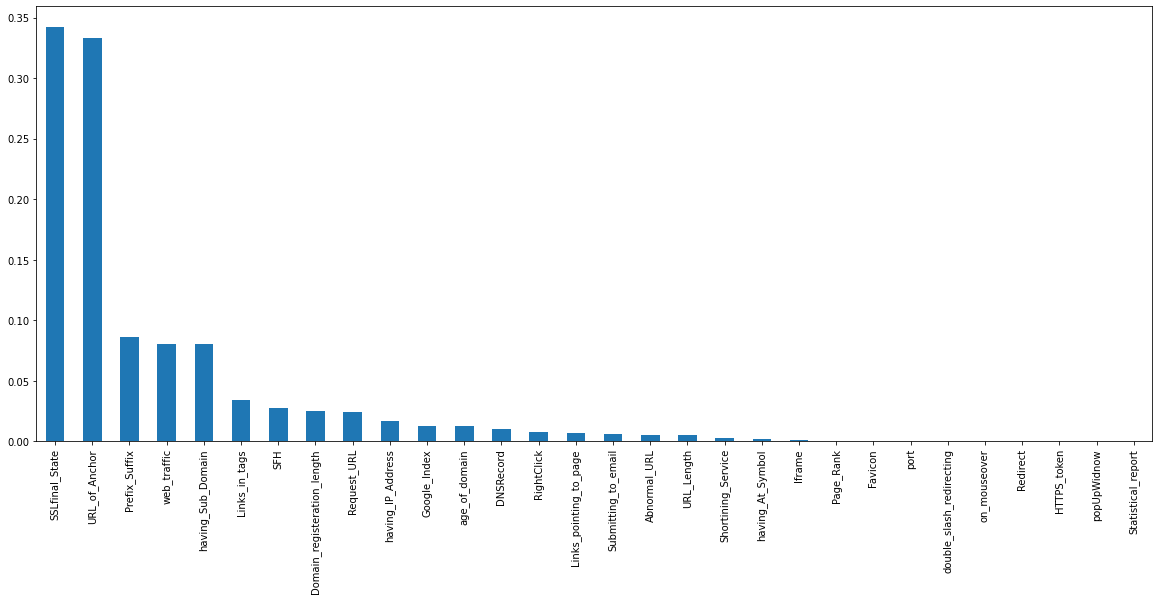

In [ ]:
#Let's plot the orderded mutual_info valuesper feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8)) 

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#Now we will select top 20 featues 
sel_twenty_cols=SelectKBest(mutual_info_classif,k=20)
sel_twenty_cols.fit(X_train,y_train)
X_train.columns[sel_twenty_cols.get_support()]

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Redirect', 'on_mouseover', 'RightClick',
       'age_of_domain', 'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [ ]:
FinalData=df.drop(['DNSRecord', 'Submitting_to_email', 'Abnormal_URL', 'having_At_Symbol', 'Iframe', 'Favicon', 'port', 'double_slash_redirecting', 'HTTPS_token', 'popUpWidnow' ], axis=1)

In [ ]:
FinalData.head()

,having_IP_Address,URL_Length,Shortining_Service,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Redirect,on_mouseover,RightClick,age_of_domain,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,-1,-1,-1,-1,1,-1,1,-1,0,1,1,-1,-1,-1,1,1,-1,0
1,1,1,1,-1,0,1,-1,1,0,-1,-1,0,1,1,-1,0,-1,1,1,1,0
2,1,0,1,-1,-1,-1,-1,1,0,-1,-1,0,1,1,1,1,-1,1,0,-1,0
3,1,0,1,-1,-1,-1,1,-1,0,0,-1,0,1,1,-1,1,-1,1,-1,1,0
4,1,0,-1,-1,1,1,-1,1,0,0,-1,0,-1,1,-1,0,-1,1,1,1,1


In [ ]:
FinalData.shape

(11055, 21)

In [ ]:
FinalData.to_csv('My new_data')